# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_results= pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')
mouse_study_results.head()
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice= mouse_study_results['Mouse ID'].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID.
#duplicate_mouse_data= mouse_study_results.duplicate_mouse_ids 
duplicate_mouse_data = mouse_study_results.loc[mouse_study_results["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results=mouse_study_results[mouse_study_results['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [32]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean= clean_mouse_study_results['Mouse ID'].nunique()
total_mice_clean


248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
Mean = clean_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=clean_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var=clean_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Std_dev=clean_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std() 
Sem=clean_mouse_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat= pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":var,"Tumor Volume Std.Dev.":Std_dev,"Tumor Volume Std.Err.":Sem})
            
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_stat = clean_mouse_study_results.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std_dev=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)
summary_stat


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

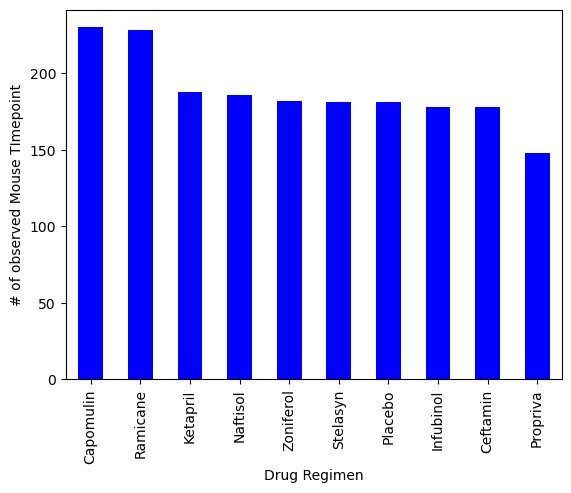

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summary_stat_bar=clean_mouse_study_results["Drug Regimen"].value_counts()
summary_stat_bar.plot(kind="bar", facecolor="blue")
#plt.title("Mouse ID/Timepoints for each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse TImepoint")
plt.show()

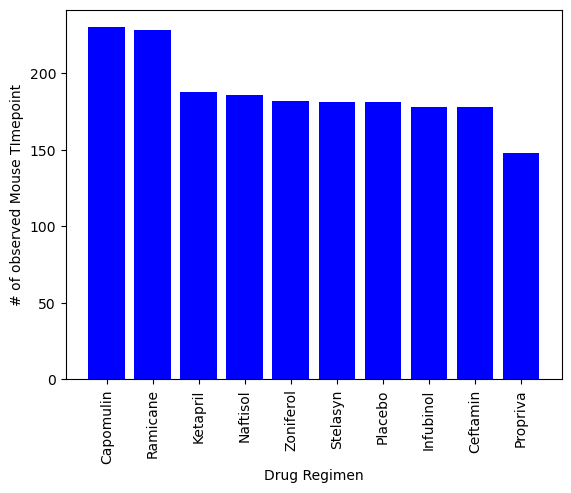

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(summary_stat_bar.index,summary_stat_bar.values,color='blue')
#plt.title("Mouse ID/Timepoints for each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse TImepoint")
plt.xticks(rotation=90)
plt.show()


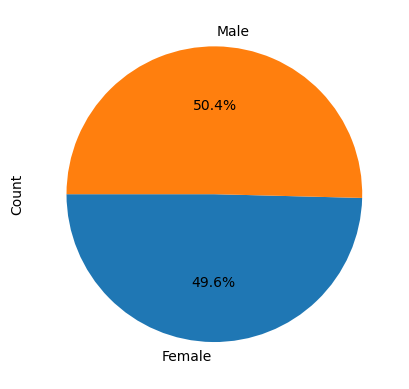

In [46]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
distinct_mice = clean_mouse_study_results[["Mouse ID", "Sex"]].drop_duplicates()

# Compute the counts for each gender
gender_counts = distinct_mice["Sex"].value_counts()
gender_counts = gender_counts.reindex(['Female', 'Male'])

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180, ylabel='Count')

plt.show()


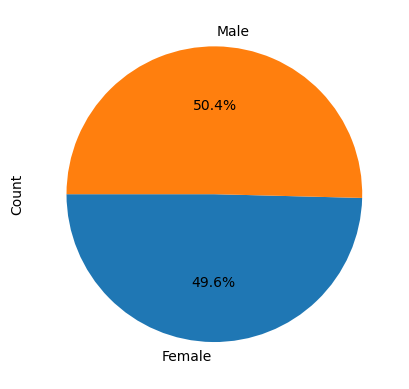

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Make the pie chart
distinct_mice = clean_mouse_study_results[["Mouse ID", "Sex"]].drop_duplicates()

# Compute the counts for each gender
gender_counts = distinct_mice["Sex"].value_counts()
gender_counts = gender_counts.reindex(['Female', 'Male'])
# Generate a pie chart with Matplotlib
plt.pie(
    gender_counts.values, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=180
)
plt.ylabel("Count")
plt.show()



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

greatest_timepoint = clean_mouse_study_results.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint= greatest_timepoint.reset_index()
greatest_timepoint_df = pd.merge(greatest_timepoint, clean_mouse_study_results, on=['Mouse ID', 'Timepoint'],how='left')
greatest_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:

# Put treatments into a list for for loop (and later for plot labels)
treatment_group = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_group:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol =greatest_timepoint_df.loc[greatest_timepoint_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    # Identify outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    # Print potential outliers for each treatment
    print(f"{treatment}'s potential outliers: {outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\seyhr\AppData\Local\Temp\ipykernel_17216\1277708486.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatment_group)


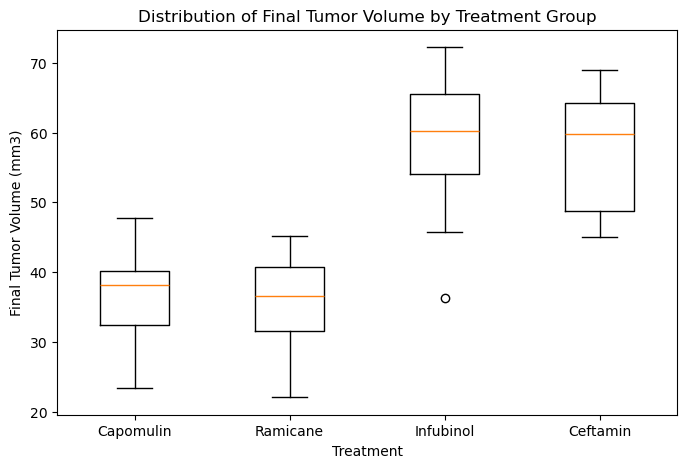

In [61]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(8,5))
plt.boxplot(tumor_vol_data, labels=treatment_group)
plt.title('Distribution of Final Tumor Volume by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(False)
flierprops=dict(marker='o', color='red', markersize=10)
plt.show()

## Line and Scatter Plots

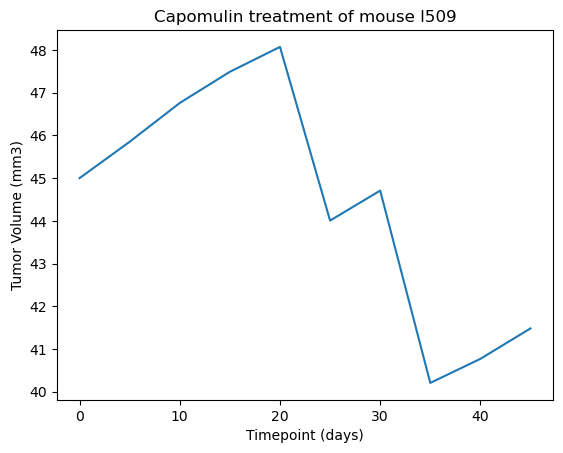

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Mouse_id = clean_mouse_study_results[(clean_mouse_study_results['Drug Regimen']=='Capomulin')]
Mouse_id = 'l509'
Drug_regimen = 'Capomulin'
mouse_info = clean_mouse_study_results[(clean_mouse_study_results['Mouse ID'] == Mouse_id) & (clean_mouse_study_results['Drug Regimen'] == Drug_regimen)]
plt.plot(mouse_info['Timepoint'],mouse_info['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"{Drug_regimen} treatment of mouse {Mouse_id}")
plt.show()

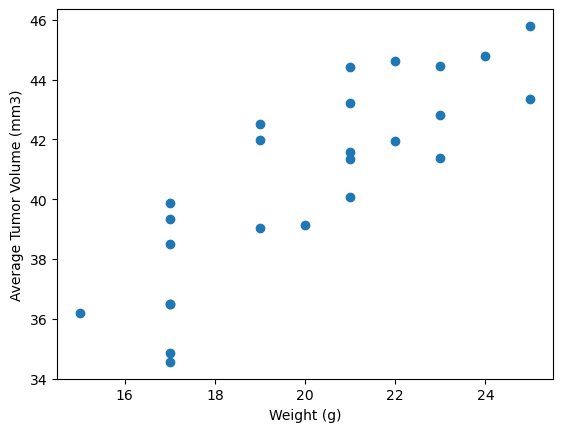

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mice_weight_df = clean_mouse_study_results[clean_mouse_study_results['Drug Regimen'] == "Capomulin"]
mice_weight_df = mice_weight_df.reset_index()
mice_weight_df
mice_weight= mice_weight_df.groupby("Mouse ID")["Weight (g)"].first()
avg_observ_tumor_volume= mice_weight_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(mice_weight,avg_observ_tumor_volume,marker='o') 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

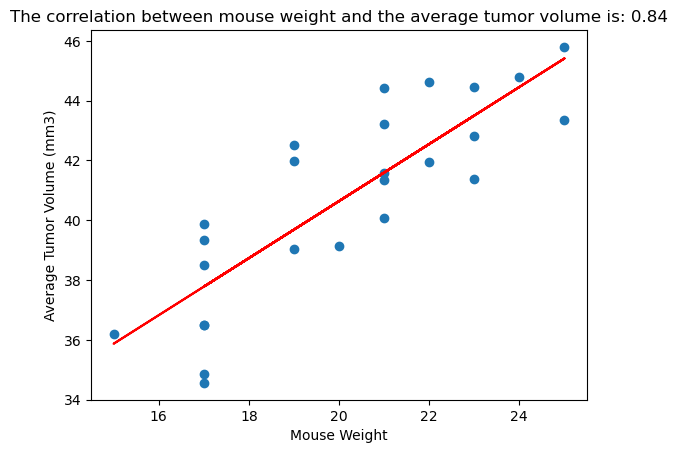

In [69]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor_coeff, _ = st.pearsonr(mice_weight,avg_observ_tumor_volume)
slope,intercept, r_value, p_value, std_errr = st.linregress(mice_weight,avg_observ_tumor_volume)
plt.scatter(mice_weight,avg_observ_tumor_volume,marker ='o')
plt.plot(mice_weight,slope * mice_weight + intercept, color='red')
plt.title(f"The correlation between mouse weight and the average tumor volume is: {cor_coeff:.2f}")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()